# SyncUp Agentic AI Demo (LangGraph)

This notebook builds a minimal agent aligned with your SyncUp idea:
- Chat, Team Matchmaking, Mentor Recommender
- Structured outputs (Pydantic)
- LangGraph routing + memory
- Graph visualization
- Exports a CLI runner and Streamlit app

In [2]:

# If needed, install deps (uncomment when running locally)
# !pip install -r /mnt/data/syncup_agent/requirements.txt
import os, json
from IPython.display import Image, display
from graph import get_graph, build_hackathon_graph
from common import tool_matchmake, tool_mentor, ChatResponse, MatchResult, MentorRecommendation
print("Ready.")


Ready.


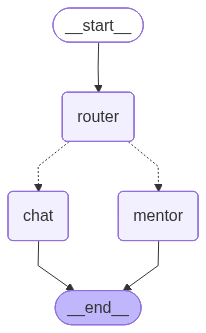

In [3]:

# Build workflow and show its Mermaid diagram as PNG (if supported)
wf = get_graph()
try:
    png = wf.get_graph().draw_mermaid_png()
    display(Image(png))
except Exception as e:
    print("Mermaid PNG not available in this environment. Attempting .draw_png() fallback...")
    try:
        png = wf.get_graph().draw_png()
        display(Image(png))
    except Exception as e2:
        print("Graph visualization unavailable:", e2)


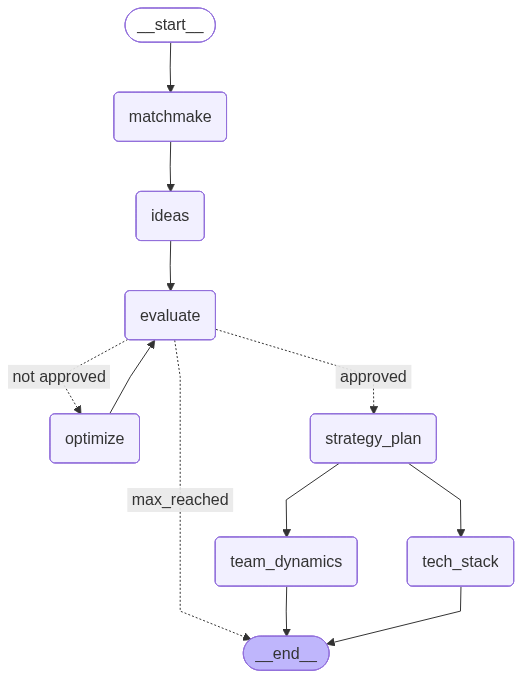

In [1]:
from graph import build_hackathon_graph
from IPython.display import Image, display

# Build workflow
wf = build_hackathon_graph()

# Try visualizing
try:
    png = wf.get_graph().draw_mermaid_png()
    display(Image(png))
except Exception as e:
    print("Mermaid PNG not available in this environment. Attempting .draw_png() fallback...")
    try:
        png = wf.get_graph().draw_png()
        display(Image(png))
    except Exception as e2:
        print("Graph visualization unavailable:", e2)


In [ ]:

# Example 1: Auto-route a chat that asks for a team
from uuid import uuid4
state = {
    "user_input": "Find me a team for AI + Healthcare",
    "context": {"users_path": "d:/Agent/data/mock_users.json",
                "mentors_path": "d:/Agent/data/mock_mentors.json",
                "matchmake_payload": {"skills": ["python","ml"], "desired": ["react","node","mongodb"]}}
}
# out = wf.invoke(state)
out = wf.invoke(
    state,
    config={"configurable": {"thread_id": "notebook-session-1"}}  
)

out["output"]


{'type': 'matchmake',
 'query': {'skills': ['python', 'ml'],
  'desired': ['react', 'node', 'mongodb']},
 'candidates': [{'id': 'u3',
   'name': 'Kabir',
   'match_score': 2.25,
   'complement_skills': ['node', 'mongodb']},
  {'id': 'u2',
   'name': 'Isha',
   'match_score': 1.25,
   'complement_skills': ['react']},
  {'id': 'u1', 'name': 'Aarav', 'match_score': 0.25, 'complement_skills': []},
  {'id': 'u5', 'name': 'Rohit', 'match_score': 0.25, 'complement_skills': []}],
 'trace': {'steps': ['Parsing input → skills & desired skills',
   'Loading candidate users',
   'Scoring complementarity',
   'Returning top candidates']}}

In [ ]:

# Example 2: Ask for mentors
state = {
    "user_input": "Who could mentor me?",
    "context": {"users_path": "d:/Agent/data/mock_users.json",
                "mentors_path": "d:/Agent/data/mock_mentors.json",
                "mentor_goal": "AI for healthcare project"}
}
out = wf.invoke(
    state,
    config={"configurable": {"thread_id": "notebook-session-1"}}  
)

out["output"]


{'type': 'mentor',
 'goal': 'AI for healthcare project',
 'mentors': [{'id': 'm1',
   'name': 'Dr. Meera',
   'score': 2.0,
   'why': 'Overlaps on: ai, healthcare'},
  {'id': 'm2', 'name': 'Sanjay', 'score': 0.0, 'why': 'General guidance'},
  {'id': 'm3', 'name': 'Anita', 'score': 0.0, 'why': 'General guidance'},
  {'id': 'm4', 'name': 'Vikram', 'score': 0.0, 'why': 'General guidance'}],
 'trace': {'steps': ['Parsing goal description',
   'Loading mentor directory',
   'Scoring expertise overlap',
   'Returning recommended mentors']}}

In [11]:

# Example 3: Plain chat
state = {
    "user_input": "What events are happening on SyncUp?",
    "context": {"users_path": "d:/Agent/data/mock_users.json",
                "mentors_path": "d:/Agent/data/mock_mentors.json"}
}
out = wf.invoke(
    state,
    config={"configurable": {"thread_id": "notebook-session-1"}}  
)

out["output"]


{'type': 'chat',
 'reply': '[mock-llm] You are SyncUp assistant. Be concise and helpful. User: What events are happening on SyncUp?...',
 'trace': {'steps': ['Router → matchmake',
   'Router → matchmake',
   'Router → matchmake',
   'Router → mentor',
   'Router → chat']}}

In [4]:
wf = build_hackathon_graph()
out = wf.invoke({"some": "input"})

ValidationError: 4 validation errors for HackathonState
duration
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
user_skills
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
required_skills
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
goal
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing